In [9]:
import pandas as pd
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
column_list = df.columns

In [8]:
## How many different companies are represented in the data set?
companies = df['Company Name'].dropna()
num_companies = len(set(companies))
print(num_companies)

439


In [21]:
## What is the total number of jobs created for businesses in Queens?
queens_df = df[df['Borough'] == 'Queens']
queens_jobs = queens_df['Job created'].dropna()
queens_jobs_created = sum(queens_jobs)
print(queens_jobs_created)

102.0


In [29]:
## How many different unique email domains names are there in the data set
email_list = df['company email'].dropna()
unique_emails = len(set(email_list))
print(unique_emails)

420


In [55]:
## Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

NTA_list = list(set(df['NTA'].dropna()))
nta_dict = dict()
for NTA in NTA_list:
    nta_df = df[df['NTA'] == NTA]
    company_list = nta_df['Company Name'].dropna()
    if len(company_list) >= 5:
        total_savings = nta_df['Total Savings'].dropna()
        total_jobs_created = nta_df['Job created'].dropna()
        if len(total_savings):
            avg_tot_savings = sum(total_savings)/len(total_savings)
        else:
            avg_tot_savings = 0
        if len(total_jobs_created):
            avg_jobs_created = sum(total_jobs_created)/len(total_jobs_created)
        else:
            avg_jobs_created = 0
        nta_dict[NTA] = (avg_tot_savings,avg_jobs_created)
print(nta_dict)

{'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': (59950.340000000004, 0), 'Springfield Gardens South-Brookville': (17757.662, 0), 'Battery Park City-Lower Manhattan': (469890.79666666663, 0), 'College Point': (17159.372857142855, 2.0), 'Queensbridge-Ravenswood-Long Island City': (61830.770625, 0), 'East New York': (48433.09333333333, 15.0), 'park-cemetery-etc-Brooklyn': (14327.419333333331, 0), 'Hunts Point': (39246.016153846154, 12.0), 'Mott Haven-Port Morris': (17843.937857142857, 3.3333333333333335), 'Carroll Gardens-Columbia Street-Red Hook': (24337.390000000003, 0), 'Steinway': (11227.155714285715, 20.0), 'Crown Heights North': (4036.298888888889, 0), 'SoHo-TriBeCa-Civic Center-Little Italy': (37214.024, 0), 'Bushwick South': (26140.455000000005, 10.0), 'Sunset Park West': (14316.976875000002, 0), 'East Williamsburg': (13990.626363636366, 0), 'Maspeth': (6658.283333333334, 10.0), 'Hunters Point-Sunnyside-West Maspeth': (23931.398933333337, 0), 'Manhattanville': (2760.888888888

In [53]:
frame = [[nta,nta_dict[nta][0],nta_dict[nta][1]] for nta in nta_dict.keys()]
new_df = pd.DataFrame(frame, columns = ['NTA', 'Average Total Savings','Average Jobs Created'])
new_df.to_csv('Milestone Project.csv')

{'Battery Park City-Lower Manhattan': (469890.79666666663, 0),
 'Bushwick South': (26140.455000000005, 10.0),
 'Carroll Gardens-Columbia Street-Red Hook': (24337.390000000003, 0),
 'College Point': (17159.372857142855, 2.0),
 'Crown Heights North': (4036.298888888889, 0),
 'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': (59950.340000000004, 0),
 'East New York': (48433.09333333333, 15.0),
 'East Williamsburg': (13990.626363636366, 0),
 'Greenpoint': (9753.649285714284, 0),
 'Hunters Point-Sunnyside-West Maspeth': (23931.398933333337, 0),
 'Hunts Point': (39246.016153846154, 12.0),
 'Manhattanville': (2760.8888888888887, 0),
 'Maspeth': (6658.283333333334, 10.0),
 'Mott Haven-Port Morris': (17843.937857142857, 3.3333333333333335),
 'Queensbridge-Ravenswood-Long Island City': (61830.770625, 0),
 'SoHo-TriBeCa-Civic Center-Little Italy': (37214.024, 0),
 'Springfield Gardens South-Brookville': (17757.662, 0),
 'Steinway': (11227.155714285715, 20.0),
 'Sunset Park West': (14316.9768750

In [54]:
"""Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
histogram of the log of the average total savings.
line plot of the total jobs created for each month."""

import matplotlib.pyplot as plt

In [57]:
## Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?

NTA_list = list(set(df['NTA'].dropna()))
total_jobs_list = []
avg_tot_savings_list = []
for NTA in NTA_list:
    nta_df = df[df['NTA'] == NTA]
    company_list = nta_df['Company Name'].dropna()
    total_savings = nta_df['Total Savings'].dropna()
    total_jobs_created = nta_df['Job created'].dropna()
    if len(total_savings):
        avg_tot_savings = sum(total_savings)/len(total_savings)
    else:
        avg_tot_savings = 0
    if len(total_jobs_created):
        jobs_created = sum(total_jobs_created)
    else:
        jobs_created = 0
    total_jobs_list.append(jobs_created)
    avg_tot_savings_list.append(avg_tot_savings)
    
    
    

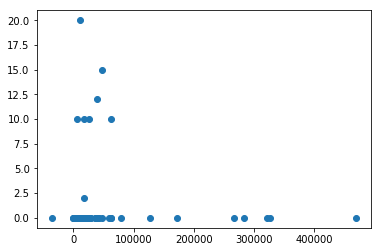

In [74]:
plt.scatter(avg_tot_savings_list,total_jobs_list)
def sgn(x):
    if x >= 0:
        return 1
    else:
        return -1

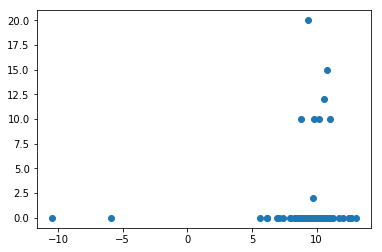

In [75]:
import numpy as np
plt.scatter([sgn(x)*np.log(abs(x)) for x in avg_tot_savings_list],total_jobs_list)

(array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  8., 54., 14.]),
 array([-10.48521329,  -8.13066641,  -5.77611952,  -3.42157263,
         -1.06702574,   1.28752115,   3.64206804,   5.99661493,
          8.35116182,  10.70570871,  13.0602556 ]),
 <a list of 10 Patch objects>)

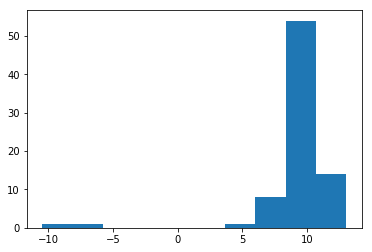

In [78]:
plt.hist([sgn(x)*np.log(abs(x)) for x in avg_tot_savings_list])

In [87]:
df['Month/Year'] = df['Effective Date'].transform(lambda x: (x.split('/')[0],x.split('/')[2]))

In [142]:
jobs_per_month_dict = dict()
for month, year in month_year_list:
    mon_year_df = df[df['Month/Year'] == (month, year)]
    jobs_created_list = mon_year_df['Job created'].dropna()
    if len(jobs_created_list):
        jobs_created = sum(jobs_created_list)
    else:
        jobs_created = 0
    jobs_per_month_dict[(month,year)] = jobs_created

In [144]:
month_year_list = sorted(list(set(df['Month/Year'])), key = lambda x: (x[1],x[0]))
month_dict = {'01': 'Jan', '02': 'Feb', '03': 'Mar', '04': 'Apr', '05': 'May', '06': 'Jun', '07': 'Jul', '08': 'Aug', '09': 'Sep', '10': 'Oct', '11': 'Nov', '12':'Dec'}
date_list = [month_dict[x[0]]+str(x[1]) for x in month_year_list]

In [154]:
new_frame = [[date_list[month_year_list.index((month,year))], jobs_per_month_dict[(month,year)]] for month, year in month_year_list]
jobs_per_month_df = pd.DataFrame(new_frame,columns = ['Month/Year', 'Jobs Created'])

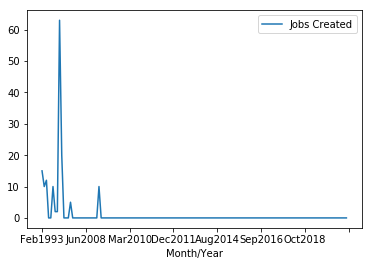

In [159]:
jobs_per_month_df.plot.line(x = 'Month/Year', y = 'Jobs Created')

[('Feb1993', 15.0),
 ('Mar2004', 10.0),
 ('Feb2005', 12.0),
 ('Mar2005', 0.0),
 ('Jun2005', 0.0),
 ('Mar2006', 10.0),
 ('Apr2007', 2.0),
 ('May2007', 2.0),
 ('Jun2007', 63.0),
 ('Jul2007', 20.0),
 ('Aug2007', 0.0),
 ('Sep2007', 0.0),
 ('Oct2007', 0.0),
 ('Nov2007', 5.0),
 ('Dec2007', 0.0),
 ('Jan2008', 0.0),
 ('Feb2008', 0.0),
 ('Mar2008', 0.0),
 ('Apr2008', 0.0),
 ('May2008', 0.0),
 ('Jun2008', 0.0),
 ('Jul2008', 0.0),
 ('Aug2008', 0.0),
 ('Sep2008', 0.0),
 ('Oct2008', 0.0),
 ('Nov2008', 0.0),
 ('Dec2008', 10.0),
 ('Jan2009', 0.0),
 ('Feb2009', 0.0),
 ('Mar2009', 0.0),
 ('Apr2009', 0.0),
 ('Jun2009', 0.0),
 ('Jul2009', 0.0),
 ('Aug2009', 0.0),
 ('Sep2009', 0.0),
 ('Oct2009', 0.0),
 ('Nov2009', 0.0),
 ('Dec2009', 0.0),
 ('Jan2010', 0.0),
 ('Feb2010', 0.0),
 ('Mar2010', 0.0),
 ('Apr2010', 0.0),
 ('May2010', 0.0),
 ('Jun2010', 0.0),
 ('Jul2010', 0.0),
 ('Aug2010', 0.0),
 ('Sep2010', 0.0),
 ('Oct2010', 0.0),
 ('Nov2010', 0.0),
 ('Dec2010', 0.0),
 ('Jan2011', 0.0),
 ('Feb2011', 0.0),
 ('Ma